In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from pytrends.request import TrendReq
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
limit = 100  
coin_market_cap_api = 'https://api.coinmarketcap.com/v1/ticker/?limit={}'.format(limit)
 
now = pd.datetime.now()
market_data = pd.read_json(coin_market_cap_api)
market_data.head()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,6.539721e+09,17474512,bitcoin,1547145445,64054064234,2.100000e+07,Bitcoin,-0.18,-9.19,-4.92,1.000000,3665.570989,1,BTC,17474512
1,8.301350e+08,41040405095,ripple,1547145422,13549912713,1.000000e+11,XRP,-0.02,-9.84,-8.67,0.000090,0.330160,2,XRP,99991724864
2,3.160242e+09,104301078,ethereum,1547145436,13253094995,NaN,Ethereum,-0.47,-15.88,-14.89,0.034749,127.065753,3,ETH,104301078
3,3.383026e+08,17558950,bitcoin-cash,1547145432,2346501477,2.100000e+07,Bitcoin Cash,-0.39,-16.17,-17.93,0.036546,133.635637,4,BCH,17558950
4,1.220841e+09,906245118,eos,1547145432,2178791009,NaN,EOS,-0.37,-15.41,-10.97,0.000657,2.404196,5,EOS,1006245120


In [3]:
market_data.columns

Index(['24h_volume_usd', 'available_supply', 'id', 'last_updated',
       'market_cap_usd', 'max_supply', 'name', 'percent_change_1h',
       'percent_change_24h', 'percent_change_7d', 'price_btc', 'price_usd',
       'rank', 'symbol', 'total_supply'],
      dtype='object')

In [4]:
market_data1 = market_data[['name','price_usd','percent_change_7d']]
market_data1.set_index('name', inplace=True)
crypto1 = market_data1.sort_values(by='percent_change_7d', ascending=False).head(10)
crypto2 = market_data1.sort_values(by='percent_change_7d', ascending=True).head(10)

In [5]:
crypto1

,price_usd,percent_change_7d
name,,
REPO,0.549453,132.20
ODEM,0.279875,53.20
TRON,0.024647,21.60
Holo,0.000554,17.98
Buggyra Coin Zero,0.038353,12.07
HyperCash,0.965777,11.09
Maximine Coin,0.010715,10.01
Mixin,99.018919,9.09
Status,0.019179,8.97


In [6]:
crypto2

,price_usd,percent_change_7d
name,,
MobileGo,0.386626,-31.12
Revain,0.191374,-28.45
QASH,0.094930,-21.49
MaidSafeCoin,0.116419,-19.69
Crypto.com Chain,0.017188,-19.66
IOTA,0.307596,-19.42
KuCoin Shares,0.508156,-18.51
Metaverse ETP,0.580183,-18.38
Bitcoin Cash,133.635637,-17.93


In [7]:
crypto = crypto1.append(crypto2).sort_values(by='percent_change_7d', ascending=False)

In [8]:
crypto

,price_usd,percent_change_7d
name,,
REPO,0.549453,132.20
ODEM,0.279875,53.20
TRON,0.024647,21.60
Holo,0.000554,17.98
Buggyra Coin Zero,0.038353,12.07
HyperCash,0.965777,11.09
Maximine Coin,0.010715,10.01
Mixin,99.018919,9.09
Status,0.019179,8.97


Text(0,0.5,'% Percent change')

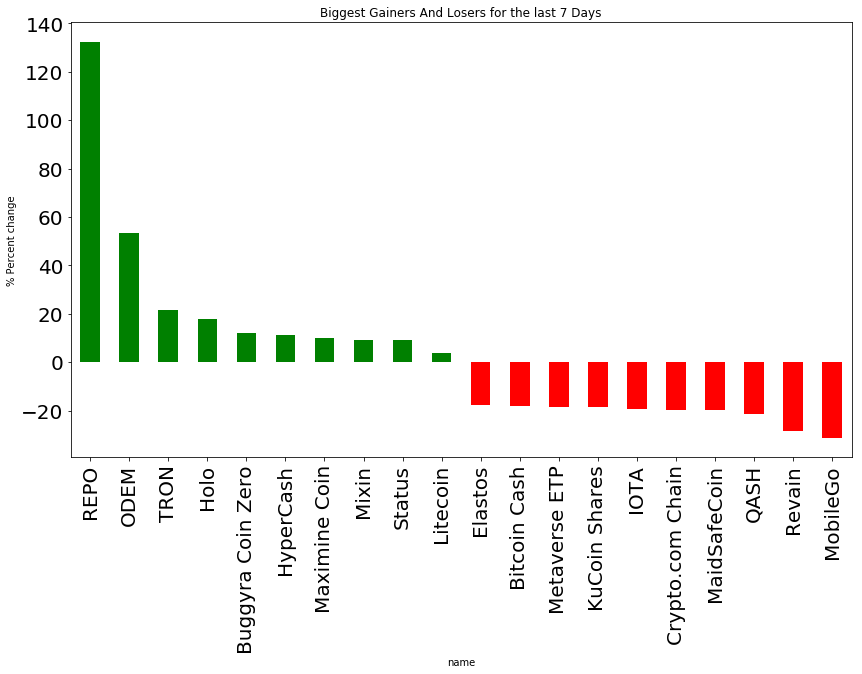

In [21]:
crypto.percent_change_7d.plot(kind='bar',title='Biggest Gainers And Losers for the last 7 Days', fontsize=20,
color = ['g' if i>0 else 'r' for i in crypto.percent_change_7d ], figsize=(14,8));
plt.ylabel('% Percent change')

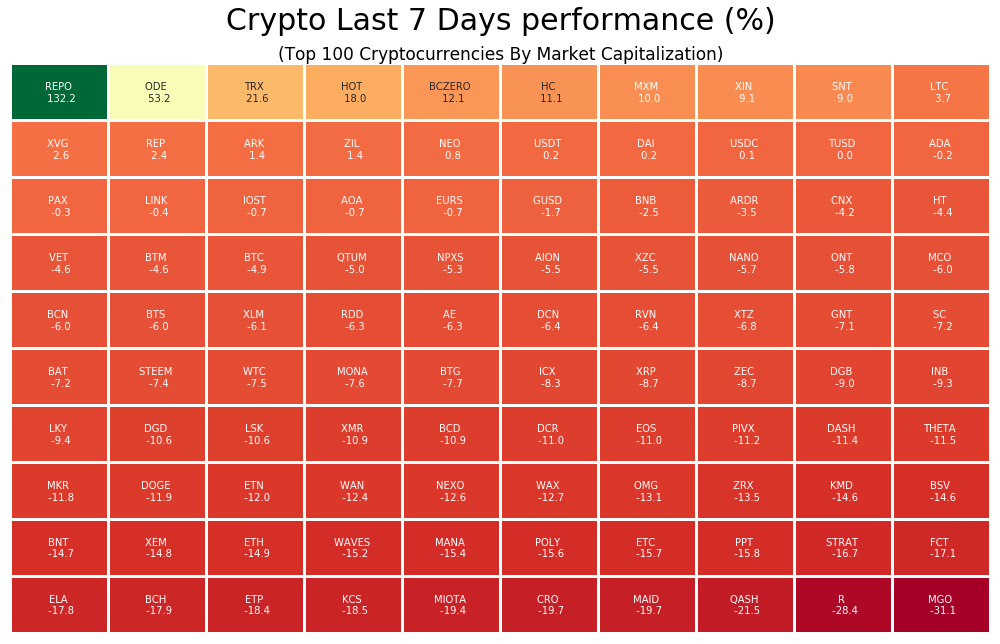

In [22]:
market_data3 = market_data[['symbol', 'percent_change_7d']]
market_data3 = market_data3.sort_values(by='percent_change_7d', ascending=False)
symbol = ((np.asarray(market_data3['symbol'])).reshape(10,10) )
percent_change = ((np.asarray(market_data3['percent_change_7d'])).reshape(10,10,))

labels = (np.asarray(["{0} \n {1:.1f}".format(symbol, percent_change )
                      for symbol, percent_change in zip(symbol.flatten(),
                                               percent_change.flatten())])).reshape(10,10)

fig, ax = plt.subplots(figsize=(14,9))
plt.title('Crypto Last 7 Days performance (%)',fontsize=30)
plt.suptitle('(Top 100 Cryptocurrencies By Market Capitalization)', y=0.93, fontsize=17)
ax.title.set_position([0.5,1.05]);
sns.heatmap(percent_change, annot=labels, fmt="", cmap='RdYlGn', cbar=False, lw=2,yticklabels=False,xticklabels=False, ax=ax);
plt.tight_layout();

In [23]:
market_data2 = market_data[['name','symbol', 'price_usd','market_cap_usd' ]]
market_data2.set_index('name', inplace=True)
crypto_mc = market_data2.sort_values(by='market_cap_usd', ascending=False).head(10)

crypto_mc

,symbol,price_usd,market_cap_usd
name,,,
Bitcoin,BTC,3665.570989,64054064234
XRP,XRP,0.330160,13549912713
Ethereum,ETH,127.065753,13253094995
Bitcoin Cash,BCH,133.635637,2346501477
EOS,EOS,2.404196,2178791009
Stellar,XLM,0.107761,2061075930
Litecoin,LTC,33.164620,1988505856
Tether,USDT,1.023916,1949334936
TRON,TRX,0.024647,1642589686


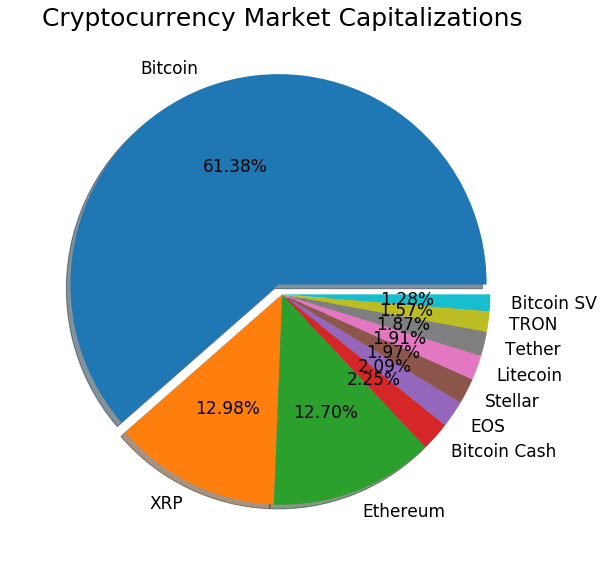

In [24]:
crypto_mc.plot(y='market_cap_usd',kind='pie',autopct='%.2f%%',figsize=(8,8),explode=(0.05,0,0,0,0,0,0,0,0,0),
legend=None,shadow=True,fontsize=17);
plt.title("Cryptocurrency Market Capitalizations", fontsize=25)
plt.axis('off');
plt.tight_layout()

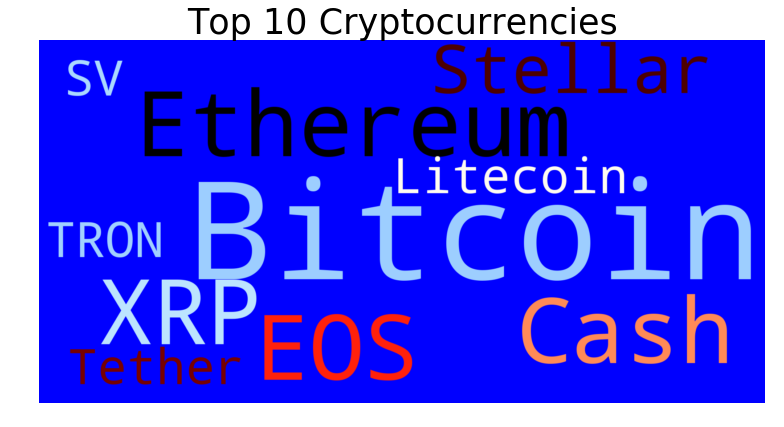

In [25]:
wrds = crypto_mc.index.tolist()
wc = WordCloud(scale=5,max_words=10,colormap="flag", background_color='blue').generate(" ".join(wrds))
plt.figure(figsize=(13,14))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.title("Top 10 Cryptocurrencies", fontsize=35)
plt.show()

## Getting Data from Google Trends

In [26]:
beginDateWindow = datetime.now().date() - timedelta(days=30)
listc = crypto_mc.index.tolist()
combo=[]
for i in listc:
    keywords = i
    pytrend = TrendReq()
    dataWindow =str(beginDateWindow) + " " + str(datetime.now().date())
    pytrend.build_payload(kw_list=[i], cat=0, timeframe=dataWindow)
    dfGTrend = pytrend.interest_over_time()
    dfGTrend.drop('isPartial', axis=1,inplace=True)
    combo.append(dfGTrend)

In [15]:
combo1 = pd.concat(combo, axis = 1)
combo1.tail()

,Bitcoin,XRP,Ethereum,Bitcoin Cash,EOS,Stellar,Litecoin,Tether,TRON,Bitcoin SV
date,,,,,,,,,,
2019-01-02,74,61,97,37,74,81,55,64,90,52
2019-01-03,74,52,91,35,66,73,42,67,79,44
2019-01-04,74,53,79,31,71,76,51,70,82,41
2019-01-05,61,44,79,29,69,71,71,75,90,27
2019-01-06,66,49,68,24,70,77,100,69,96,34


Text(0.5,1,'Google Trends and Crypto')

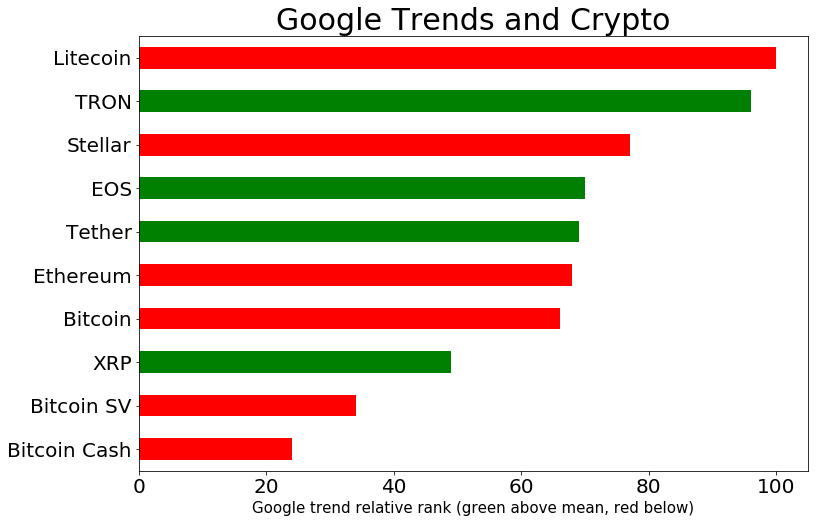

In [16]:
plt.figure(figsize=(12,8))
combo1.iloc[-1].sort_values().plot(kind='barh',fontsize=20,
color = ['g' if combo1.iloc[-1,i]>combo1.iloc[:,i].mean() else 'r' for i in range(len(combo1.columns))]);
plt.xlabel('Google trend relative rank (green above mean, red below)', fontsize=15);
plt.title('Google Trends and Crypto', fontsize=30)

In [27]:
cor = combo1.corr()

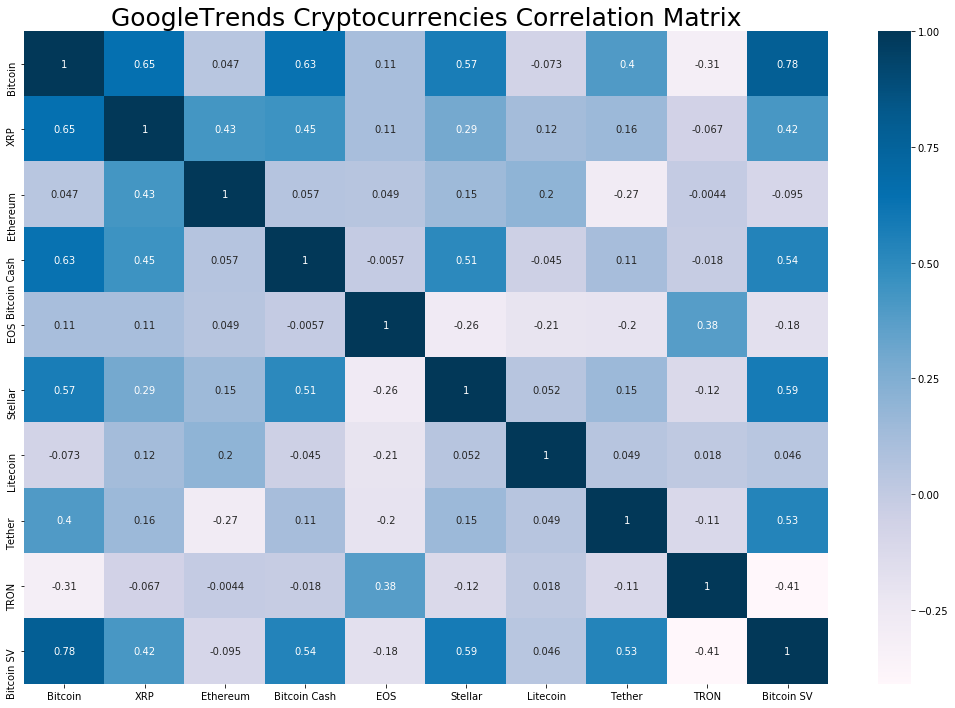

In [28]:
plt.subplots(figsize=(18,12))
ax = sns.heatmap(cor, annot = True, cmap = "PuBu") 
ax.set_title("GoogleTrends Cryptocurrencies Correlation Matrix", fontsize=25);